In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Полезные функции

In [9]:
def isnan(value):
    return value is None or value != value

In [10]:
def analyze(series, categorical: bool = None):
    if isinstance(series, pd.DataFrame):
        series = series.iloc[:, 0]

    series_unique = sorted(series.unique())

    if categorical is None:
        categorical = len(series_unique) < 30

    max_len = 10

    print(
        f"unique: {len(series_unique)}",
        f"empty: {sum([isnan(el) for el in series])}",
        f"filled: {sum([not isnan(el) for el in series])},",
        f"values: {list(series_unique[:max_len]) + [] if len(series_unique) < max_len else ['...']}" if categorical else ""
    )
    if categorical:
        for val in series_unique[:max_len]:
            if isnan(val):
                print(f"{val} - {sum(series.isna())} times")
            else:
                print(f"{val} - {sum(series == val)} times")
        if len(series_unique) < 30:
            series.hist(xrot=-30)
    else:
        print(f"min: {series.min()}, mean: {series.mean()}, max: {series.max()}, std: {series.std()}")
        series.hist()
    plt.show()

# Загрузка данных

In [11]:
df = pd.read_excel('suppliers_groups.xlsx')
df

,percent_winner,std_economy_diff,mean_price,percent_all_suppliers,all_participations,group
0,1.000000,0.000580,1.322843e+06,0.625000,8,"{5005066100, 5005066205}"
1,1.000000,0.001554,1.323066e+06,0.625000,8,"{7720492648, 5005066100}"
2,0.000000,0.000684,1.324403e+06,1.000000,5,"{7720492648, 5005066205}"
3,0.666667,0.016206,9.616195e+05,0.176471,34,"{7718538045, 5050126375}"
4,0.000000,0.008795,4.266196e+07,0.500000,10,"{5262036363, 5408130693}"
5,0.000000,0.021020,1.331830e+07,1.000000,5,"{5262036363, 7702420263}"
6,0.000000,0.014973,2.920539e+07,0.555556,9,"{5262036363, 7724053916}"
7,0.750000,0.008292,8.063812e+05,0.363636,11,"{6685024025, 5262345386}"
8,0.000000,0.050503,1.340993e+07,0.214286,28,"{6670300868, 5408130693}"
9,0.000000,0.040863,3.702526e+07,0.500000,10,"{5408130693, 7702420263}"


# Проанализируем признаки

unique: 14 empty: 0 filled: 46, 
min: 0.0, mean: 0.4926652347368461, max: 1.0, std: 0.43222668334062886


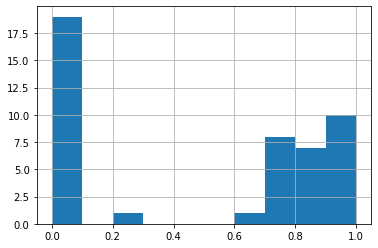

In [12]:
analyze(df['percent_winner'], categorical=False)

unique: 44 empty: 0 filled: 46, 
min: 0.0001175494229437628, mean: 0.05214561867179705, max: 0.3409694307299047, std: 0.08376946394420365


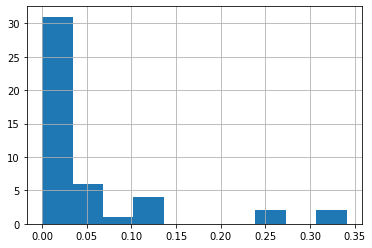

In [13]:
analyze(df['std_economy_diff'], categorical=False)

unique: 25 empty: 0 filled: 46, 
min: 0.07042253521126761, mean: 0.4927780402617516, max: 1.0, std: 0.2757994069918477


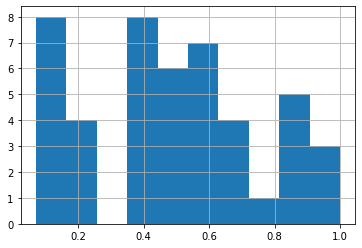

In [14]:
analyze(df['percent_all_suppliers'], categorical=False)

unique: 46 empty: 0 filled: 46, 
min: 215255.22, mean: 8382909.956827233, max: 52912343.1, std: 14302076.821663912


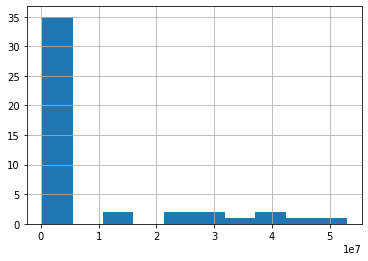

In [15]:
analyze(df['mean_price'])

# Стандартизируем признаки

In [16]:
features = [
    'percent_winner',
    'std_economy_diff',
    'percent_all_suppliers',
    'mean_price'
]

In [17]:
data = df[features]
data = (data - data.mean()) / data.std()
data

,percent_winner,std_economy_diff,percent_all_suppliers,mean_price
0,1.173770,-0.615572,0.479414,-0.493639
1,1.173770,-0.603943,0.479414,-0.493624
2,-1.139831,-0.614320,1.839097,-0.493530
3,0.402570,-0.429027,-1.146875,-0.518896
4,-1.139831,-0.517504,0.026186,2.396788
5,-1.139831,-0.371561,1.839097,0.345082
6,-1.139831,-0.443754,0.227620,1.455906
7,0.595370,-0.523509,-0.468245,-0.529750
8,-1.139831,-0.019603,-1.009764,0.351489
9,-1.139831,-0.134692,0.026186,2.002670


In [18]:
df[features] = data
df

,percent_winner,std_economy_diff,mean_price,percent_all_suppliers,all_participations,group
0,1.173770,-0.615572,-0.493639,0.479414,8,"{5005066100, 5005066205}"
1,1.173770,-0.603943,-0.493624,0.479414,8,"{7720492648, 5005066100}"
2,-1.139831,-0.614320,-0.493530,1.839097,5,"{7720492648, 5005066205}"
3,0.402570,-0.429027,-0.518896,-1.146875,34,"{7718538045, 5050126375}"
4,-1.139831,-0.517504,2.396788,0.026186,10,"{5262036363, 5408130693}"
5,-1.139831,-0.371561,0.345082,1.839097,5,"{5262036363, 7702420263}"
6,-1.139831,-0.443754,1.455906,0.227620,9,"{5262036363, 7724053916}"
7,0.595370,-0.523509,-0.529750,-0.468245,11,"{6685024025, 5262345386}"
8,-1.139831,-0.019603,0.351489,-1.009764,28,"{6670300868, 5408130693}"
9,-1.139831,-0.134692,2.002670,0.026186,10,"{5408130693, 7702420263}"


# Кластеризация

In [19]:
import scipy.cluster as clst

In [20]:
data = df[features]
data

,percent_winner,std_economy_diff,percent_all_suppliers,mean_price
0,1.173770,-0.615572,0.479414,-0.493639
1,1.173770,-0.603943,0.479414,-0.493624
2,-1.139831,-0.614320,1.839097,-0.493530
3,0.402570,-0.429027,-1.146875,-0.518896
4,-1.139831,-0.517504,0.026186,2.396788
5,-1.139831,-0.371561,1.839097,0.345082
6,-1.139831,-0.443754,0.227620,1.455906
7,0.595370,-0.523509,-0.468245,-0.529750
8,-1.139831,-0.019603,-1.009764,0.351489
9,-1.139831,-0.134692,0.026186,2.002670


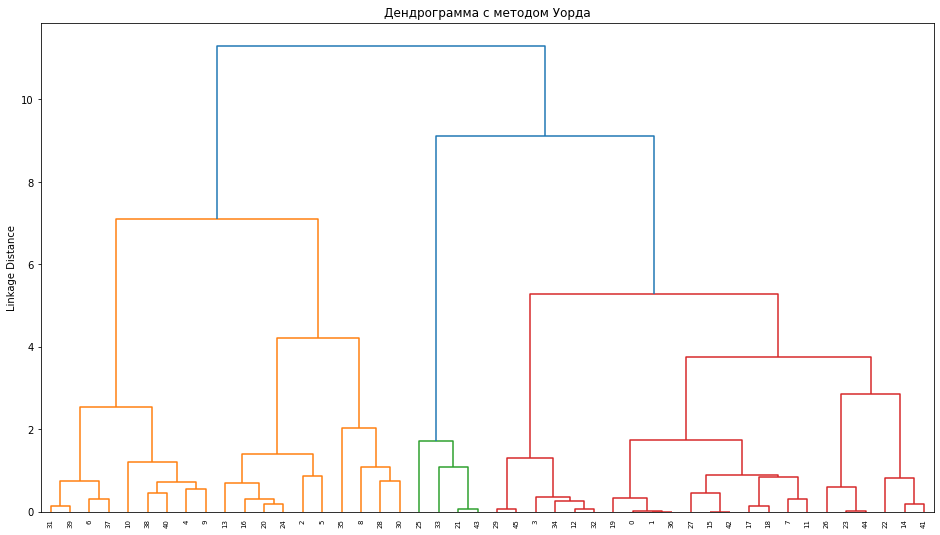

In [21]:
Z = clst.hierarchy.linkage(data, method='ward')
plt.figure(figsize=(16, 9))
dn = clst.hierarchy.dendrogram(Z, labels=data.index)
plt.xticks(rotation='vertical', fontsize=7)
plt.title('Дендрограмма с методом Уорда')
plt.ylabel('Linkage Distance');

In [22]:
from sklearn.cluster import AgglomerativeClustering

# Указать количество кластеров в параметре n_clusters
clust = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
df['cluster'] = clust.fit_predict(data)
df['cluster'].value_counts()

1    23
0    19
2     4
Name: cluster, dtype: int64

In [23]:
# Сводная таблица средних значений по кластерам
pivot_table = df.groupby('cluster')[features].mean()
pivot_table

,percent_winner,std_economy_diff,percent_all_suppliers,mean_price
cluster,,,,
0,-1.131133,-0.294482,0.284030,0.724670
1,0.862725,-0.259879,0.010549,-0.528598
2,0.412210,2.893096,-1.409796,-0.402746


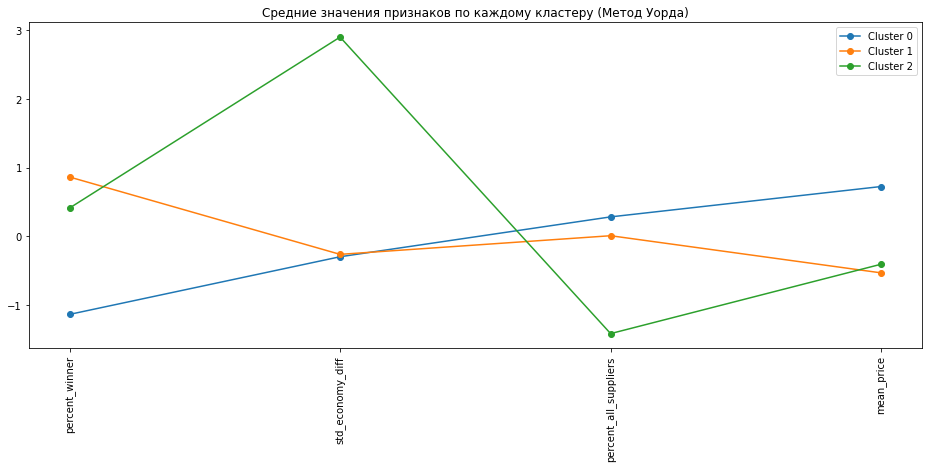

In [24]:
# Графики средних значений по кластерам

plt.figure(figsize=(16, 6))

for cluster in pivot_table.T.columns:
    plt.plot(pivot_table.T[cluster], 'o-', label=f'Cluster {cluster}')
plt.xticks(rotation='vertical')
plt.title('Средние значения признаков по каждому кластеру (Метод Уорда)')
plt.legend();

In [25]:
from sklearn.cluster import KMeans
clust = KMeans(n_clusters=3)
df['cluster'] = clust.fit_predict(data)
df['cluster'].value_counts()

1    23
0    19
2     4
Name: cluster, dtype: int64

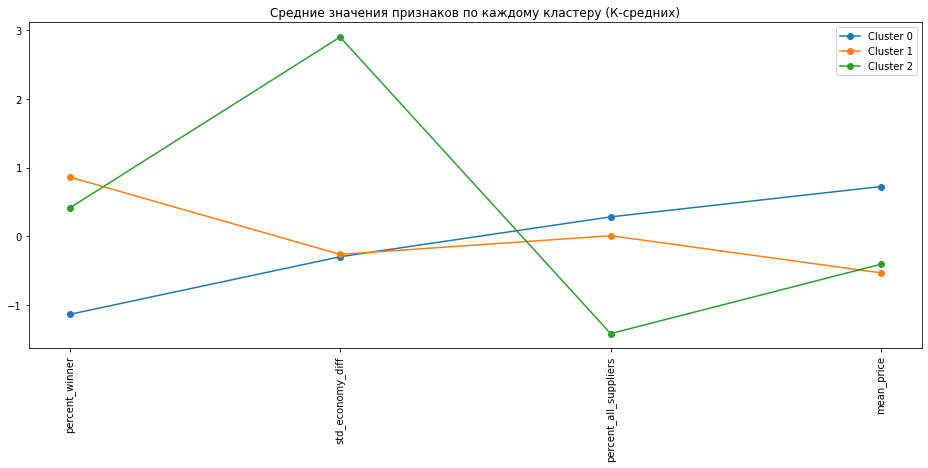

In [26]:
# Сводная таблица средних значений по кластерам
pivot_table = df.groupby('cluster')[features].mean()

# Графики средних значений по кластерам
plt.figure(figsize=(16, 6))

for cluster in pivot_table.T.columns:
    plt.plot(pivot_table.T[cluster], 'o-', label=f'Cluster {cluster}')
plt.xticks(rotation='vertical')
plt.title('Средние значения признаков по каждому кластеру (К-средних)')
plt.legend();

In [27]:
cl = df[df['cluster'] == 0]
data = cl[features]
cl

,percent_winner,std_economy_diff,mean_price,percent_all_suppliers,all_participations,group,cluster
2,-1.139831,-0.614320,-0.493530,1.839097,5,"{7720492648, 5005066205}",0
4,-1.139831,-0.517504,2.396788,0.026186,10,"{5262036363, 5408130693}",0
5,-1.139831,-0.371561,0.345082,1.839097,5,"{5262036363, 7702420263}",0
6,-1.139831,-0.443754,1.455906,0.227620,9,"{5262036363, 7724053916}",0
8,-1.139831,-0.019603,0.351489,-1.009764,28,"{6670300868, 5408130693}",0
9,-1.139831,-0.134692,2.002670,0.026186,10,"{5408130693, 7702420263}",0
10,-1.139831,-0.399934,3.113494,-0.491789,14,"{7724053916, 5408130693}",0
13,-1.139831,-0.222692,-0.554099,0.781565,24,"{7202189513, 6670300868}",0
16,-1.139831,-0.621082,-0.554883,1.033359,9,"{7203488001, 6673215650}",0
20,-1.139831,-0.601364,-0.342389,1.234793,6,"{7717764683, 7202154101}",0


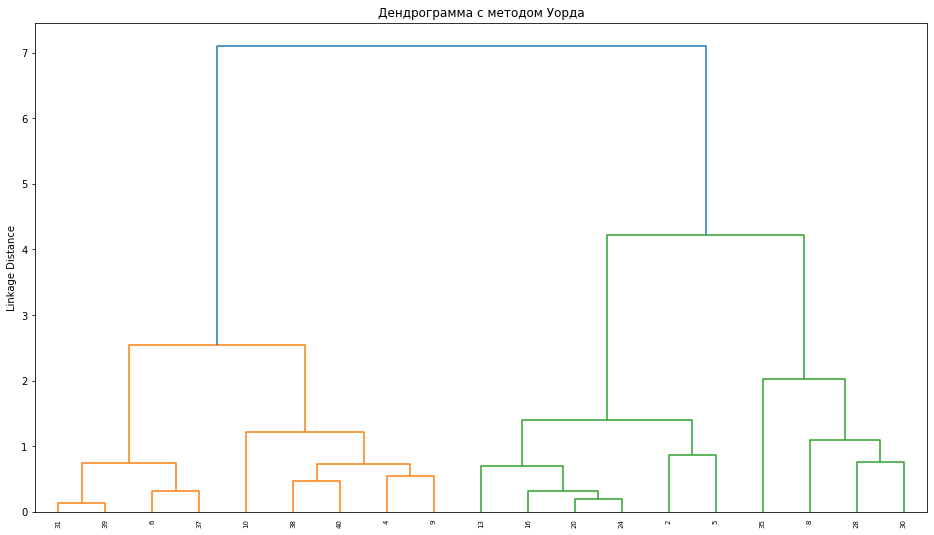

In [28]:
Z = clst.hierarchy.linkage(data, method='ward')
plt.figure(figsize=(16, 9))
dn = clst.hierarchy.dendrogram(Z, labels=data.index)
plt.xticks(rotation='vertical', fontsize=7)
plt.title('Дендрограмма с методом Уорда')
plt.ylabel('Linkage Distance');

In [29]:
clust = KMeans(n_clusters=3)
cl['cluster'] = clust.fit_predict(data)
cl['cluster'].value_counts()


/tmp/ipykernel_4152/3641640391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['cluster'] = clust.fit_predict(data)


0    9
1    6
2    4
Name: cluster, dtype: int64

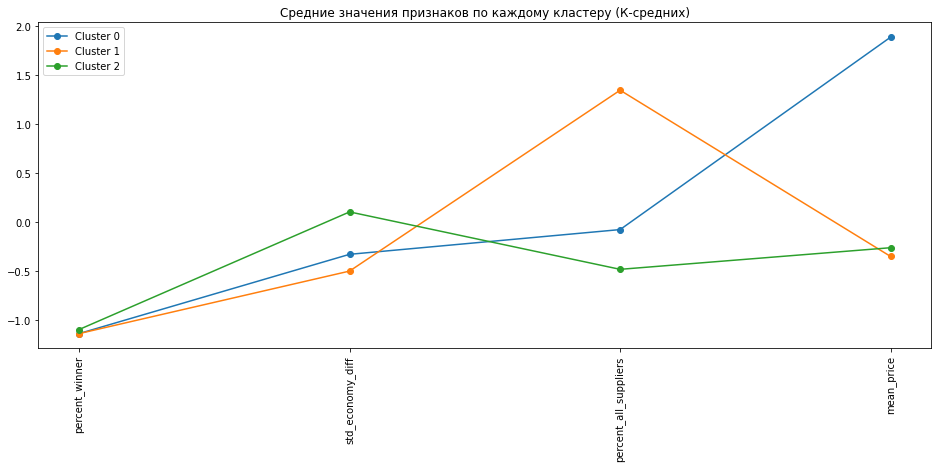

In [30]:
pivot_table = cl.groupby('cluster')[features].mean()

plt.figure(figsize=(16, 6))

for cluster in pivot_table.T.columns:
    plt.plot(pivot_table.T[cluster], 'o-', label=f'Cluster {cluster}')
plt.xticks(rotation='vertical')
plt.title('Средние значения признаков по каждому кластеру (К-средних)')
plt.legend();

In [31]:
cl

,percent_winner,std_economy_diff,mean_price,percent_all_suppliers,all_participations,group,cluster
2,-1.139831,-0.614320,-0.493530,1.839097,5,"{7720492648, 5005066205}",1
4,-1.139831,-0.517504,2.396788,0.026186,10,"{5262036363, 5408130693}",0
5,-1.139831,-0.371561,0.345082,1.839097,5,"{5262036363, 7702420263}",1
6,-1.139831,-0.443754,1.455906,0.227620,9,"{5262036363, 7724053916}",0
8,-1.139831,-0.019603,0.351489,-1.009764,28,"{6670300868, 5408130693}",2
9,-1.139831,-0.134692,2.002670,0.026186,10,"{5408130693, 7702420263}",0
10,-1.139831,-0.399934,3.113494,-0.491789,14,"{7724053916, 5408130693}",0
13,-1.139831,-0.222692,-0.554099,0.781565,24,"{7202189513, 6670300868}",1
16,-1.139831,-0.621082,-0.554883,1.033359,9,"{7203488001, 6673215650}",1
20,-1.139831,-0.601364,-0.342389,1.234793,6,"{7717764683, 7202154101}",1


https://br.fas.gov.ru/to/novosibirskoe-ufas-rossii/2573df95-4b2e-4276-93f5-6d162755986e/